In [103]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb

In [104]:
def exp_ign(gp, fp):
    return - gp * math.log(fp, 2) - (1-gp) * math.log(1-fp, 2)

def simple_log_score(outcome, forecast_prob):
    return -math.log(forecast_prob, 2) if outcome else -math.log(1 - forecast_prob, 2)

def log_score_538(outcome, forecast_prob):
    return 25 * (1 + math.log(max(forecast_prob, 1 / 14640), 2)) if outcome else \
        25 * (1 + math.log(max(1 - forecast_prob, 1 / 14640), 2)) 

# Assuming some values for governing_prob, forecast_prob, and num_people
governing_prob = 0.96
forecast_prob = 0.96

In [105]:
def simulate_person(governing_prob, forecast_prob, N):
    log_scores = { 'simple': [], '538 pts': []}
    for _ in range(N):
        outcome = random.random() < governing_prob
        log_scores['simple'].append(simple_log_score(outcome, forecast_prob))
        log_scores['538 pts'].append(log_score_538(outcome, forecast_prob))
    # For each N, calculate the average log score up to that N for each key in log_scores
    averages = {key: np.cumsum(scores) / np.arange(1, N+1) for key, scores in log_scores.items()}
    return averages

In [106]:
np.cumsum([1,2,3,4]) / np.arange(1, 5)

array([1. , 1.5, 2. , 2.5])

In [107]:
N = 150
num_people = 500

medians = {}
means = {}
p92 = {}
p08 = {}

# Simulate num_people and calculate the log scores
log_scores = [simulate_person(governing_prob, forecast_prob, N) for _ in range(num_people)]

# Make a dataframe where columns are repetitions and rows are people
df = pd.DataFrame(log_scores)

# For each column (repetition) in df, get the median, mean, and 90th percentile
column_names = list(df.columns)  # Add more column names/keys here if needed

# Assuming each dictionary in log_scores has the same keys
keys = log_scores[0].keys()

for key in keys:
    # Extract the arrays for the current key from each dictionary in log_scores
    arrays = [person[key] for person in log_scores]

    # Stack these arrays vertically
    stacked_arrays = np.vstack(arrays)

    # Calculate the median across rows (i.e., across all people) for each column
    medians[key] = np.median(stacked_arrays, axis=0)
    means[key] = np.mean(stacked_arrays, axis=0)
    p92[key] = np.quantile(stacked_arrays, 0.92, axis=0)
    p08[key] = np.quantile(stacked_arrays, 0.08, axis=0)


In [108]:
simulate_person(.97, .98, 3)

{'simple': array([0.02914635, 0.02914635, 0.02914635]),
 '538 pts': array([24.27134136, 24.27134136, 24.27134136])}

In [109]:
len(log_scores)

500

In [110]:
# Write df to a csv called "df_N40_R500.csv", no row names
df.to_csv(f"df_N{N+1}_{num_people}worlds_{governing_prob}governing_{forecast_prob}forecast.csv", index=False)

In [111]:
medians

{'simple': array([0.05889369, 0.05889369, 0.05889369, 0.05889369, 0.05889369,
        0.05889369, 0.05889369, 0.05889369, 0.05889369, 0.05889369,
        0.05889369, 0.05889369, 0.05889369, 0.05889369, 0.05889369,
        0.05889369, 0.32859737, 0.31361383, 0.3002075 , 0.28814181,
        0.27722524, 0.26730108, 0.25823988, 0.24993379, 0.24229219,
        0.2352384 , 0.22870712, 0.22264235, 0.21699584, 0.21172577,
        0.20679571, 0.20217377, 0.19783195, 0.19374553, 0.18989262,
        0.18625376, 0.18281159, 0.1795506 , 0.17645683, 0.17351775,
        0.22663622, 0.27722524, 0.27214776, 0.26730108, 0.2626698 ,
        0.25823988, 0.25399848, 0.24993379, 0.24603502, 0.24229219,
        0.23869614, 0.2352384 , 0.23191114, 0.22870712, 0.2256196 ,
        0.22264235, 0.21976957, 0.21699584, 0.21431615, 0.21172577,
        0.20922033, 0.20679571, 0.20444805, 0.23799379, 0.27050734,
        0.26730108, 0.26419052, 0.26117145, 0.25823988, 0.25539208,
        0.2526245 , 0.24993379, 0.2473

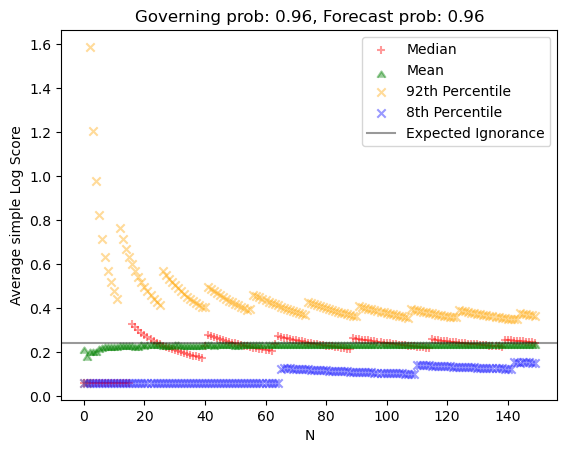

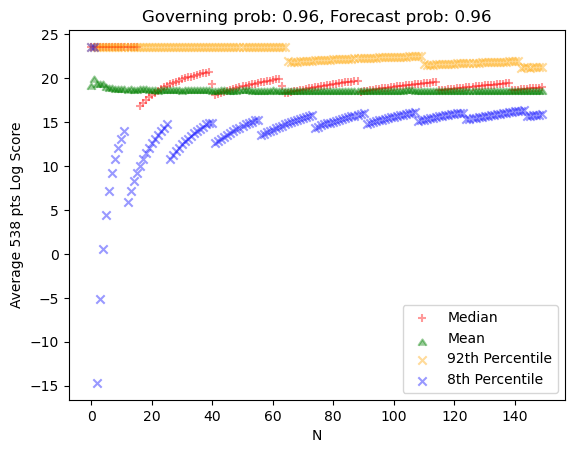

In [119]:
for col in column_names:
    # Create line plots for median, mean, and percentile
    N_values = range(N)
    plt.scatter(N_values, medians[col], color='red', label='Median', marker = '+', alpha = 0.4)
    plt.scatter(N_values, means[col], color='green', label='Mean', marker = 6, alpha = 0.4)
    plt.scatter(N_values, p92[col], color='orange', label='92th Percentile', marker = 'x', alpha = 0.4)
    plt.scatter(N_values, p08[col], color='blue', label='8th Percentile', marker = 'x', alpha = 0.4)

    # If column name is "simple," add horizontal line at exp_ign(governing_prob, forecast_prob)
    if col == 'simple':
        plt.axhline(y=exp_ign(governing_prob, forecast_prob), color='black', label='Expected Ignorance', alpha = 0.4)

    # Set the labels for the x and y axes
    plt.title(f'Governing prob: {governing_prob}, Forecast prob: {forecast_prob}')
    plt.xlabel('N')
    plt.ylabel(f'Average {col} Log Score')

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

In [114]:
# For the next part I need to make df['simple'] a dataframe
ss = pd.DataFrame(df['simple'].tolist())
ff = pd.DataFrame(df['538 pts'].tolist())

In [115]:
ss

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.089873,0.089665,0.089460
1,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.188964,0.188048,0.187144,0.186254,0.185375,0.184509,0.183655,0.182812,0.181980,0.181159
2,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.188964,0.188048,0.187144,0.186254,0.185375,0.184509,0.183655,0.182812,0.181980,0.181159
3,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.713888,0.632014,0.568334,0.517390,...,0.221481,0.220336,0.219207,0.218094,0.216996,0.215913,0.214845,0.213791,0.212751,0.242292
4,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.286516,0.284913,0.283332,0.281774,0.280237,0.278721,0.277225,0.275750,0.274295,0.272859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.221481,0.220336,0.219207,0.218094,0.216996,0.215913,0.214845,0.213791,0.212751,0.211726
496,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.156446,0.155759,0.155082,0.154414,0.153755,0.184509,0.183655,0.182812,0.181980,0.181159
497,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.188964,0.188048,0.187144,0.186254,0.185375,0.184509,0.183655,0.182812,0.181980,0.181159
498,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,0.058894,...,0.253998,0.252624,0.251270,0.249934,0.248616,0.247317,0.246035,0.244771,0.243523,0.242292


Text(0, 0.34229218908241493, '0.242')

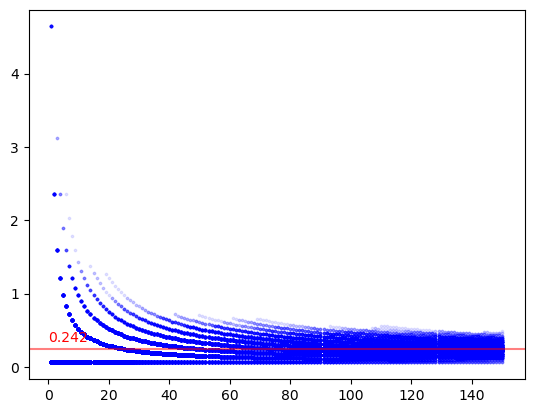

In [131]:
# On top of that, plot faintly all the log score dots (df) individually, in a column for each N
for N in range(1, N+1):
    plt.scatter([N] * num_people, ss[N-1], color='blue', alpha=0.1, s=3)

xx = exp_ign(governing_prob, forecast_prob)
# Plot horizontal line at y = xx
plt.axhline(y=xx, color='r', linestyle='-', alpha = 0.5)
# Label that line with value xx and move it up a little bit
plt.text(0, xx + 0.1, f'{xx:.3f}', color='r')

In [118]:
# What's the frequency of the minimum number in each column of ss? Just the minimum number

min_freq = {}
for col in ss.columns:
    min_val = ss[col].min()
    freq = ss[col].value_counts()[min_val]
    min_freq[col] = freq

min_freq

{0: 482,
 1: 471,
 2: 453,
 3: 437,
 4: 421,
 5: 401,
 6: 384,
 7: 370,
 8: 354,
 9: 339,
 10: 322,
 11: 313,
 12: 294,
 13: 284,
 14: 266,
 15: 260,
 16: 249,
 17: 240,
 18: 232,
 19: 216,
 20: 208,
 21: 199,
 22: 191,
 23: 183,
 24: 178,
 25: 168,
 26: 165,
 27: 155,
 28: 147,
 29: 140,
 30: 133,
 31: 123,
 32: 122,
 33: 117,
 34: 112,
 35: 108,
 36: 100,
 37: 98,
 38: 94,
 39: 91,
 40: 85,
 41: 80,
 42: 76,
 43: 72,
 44: 71,
 45: 67,
 46: 67,
 47: 65,
 48: 62,
 49: 60,
 50: 59,
 51: 58,
 52: 57,
 53: 55,
 54: 53,
 55: 51,
 56: 49,
 57: 47,
 58: 46,
 59: 45,
 60: 43,
 61: 42,
 62: 42,
 63: 41,
 64: 41,
 65: 40,
 66: 37,
 67: 36,
 68: 36,
 69: 35,
 70: 34,
 71: 34,
 72: 33,
 73: 32,
 74: 31,
 75: 29,
 76: 29,
 77: 28,
 78: 27,
 79: 26,
 80: 25,
 81: 24,
 82: 22,
 83: 21,
 84: 20,
 85: 19,
 86: 19,
 87: 19,
 88: 19,
 89: 18,
 90: 18,
 91: 18,
 92: 18,
 93: 18,
 94: 17,
 95: 16,
 96: 16,
 97: 15,
 98: 15,
 99: 14,
 100: 14,
 101: 14,
 102: 13,
 103: 13,
 104: 13,
 105: 12,
 106: 12,
 10

In [132]:
min(ss[N-1])

0.058893689053568524

In [124]:
ss[N-1].value_counts().sort_index()

0.058894    5
0.089460    2
0.089460    1
0.089460    1
0.089460    1
           ..
0.425691    1
0.425691    1
0.456257    1
0.456257    1
0.486824    1
Name: 149, Length: 97, dtype: int64

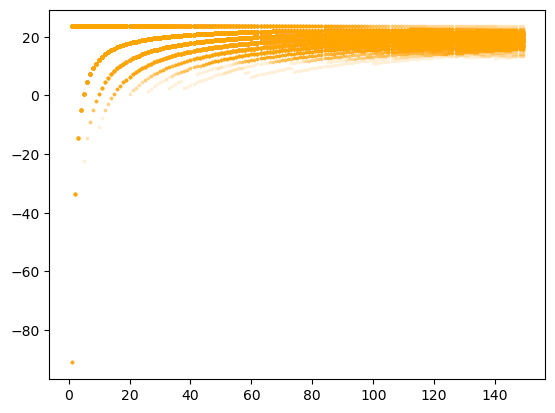

In [88]:
for N in range(1, N):
    plt.scatter([N] * num_people, ff[N-1], color='orange', alpha=0.1, s=3)